In [1]:
import pickle
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import pymc3 as pm

In [2]:
track = pickle.load(open("mario_track_1.pkl"))

In [3]:
def thresholds(vals, t_window=5):
    last_diff = 0
    last_diff_t = 0
    max_v = min(vals)
    min_v = max(vals)
    thresholds = set([0, min_v, max_v])
    for t, v in enumerate(vals):
        if (t - last_diff_t) == t_window:
            thresholds.add(last_diff)
        if v != last_diff:
            last_diff = v
            last_diff_t = t
    return thresholds

axis = 1
window = 3

velocities = track[1:,axis]-track[:-1,axis] 
print velocities
print np.convolve(velocities, np.ones(window)/window, mode='valid')

thresholds(velocities)

[ 2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2

{-5.0, -1.0, 0, 3.0}

In [11]:
def samey_intervals(vals, t_window=5):
    last_diff = 0
    last_diff_t = 0
    intervals = []
    for t, v in enumerate(vals):
        if ((t - last_diff_t) >= t_window) and v != last_diff:
            intervals.append(last_diff_t)
            intervals.append(t)
        if v != last_diff:
            last_diff = v
            last_diff_t = t
    return intervals

axis = 1
window = 2

velocities = track[1:,axis]-track[:-1,axis] 
smoothed = scipy.ndimage.filters.convolve1d(velocities, np.ones(window)/window)

print velocities
print smoothed

print samey_intervals(velocities)
print samey_intervals(smoothed)

[ 2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2.  3.  2

In [12]:
def zero_crossings(vals):
    sign_intervals = []
    last_sign_change = 0
    vsigns = np.sign(vals)
    last_sign = vsigns[0]
    for t, v in enumerate(vsigns):
        if last_sign == 0:
            last_sign = v
        elif v == 0 or v == last_sign:
            continue
        elif v != last_sign:
            sign_intervals.append(last_sign_change)
            sign_intervals.append(t)
            last_sign = v
            last_sign_change = t
    if t - 1 != last_sign_change:
        sign_intervals.append(last_sign_change)
        sign_intervals.append(t)
    return sign_intervals

axis = 2
window = 2

velocities = track[1:,axis]-track[:-1,axis] 
smoothed = scipy.ndimage.filters.convolve1d(velocities, np.ones(window)/window)

print velocities
print smoothed

print zero_crossings(velocities)
print zero_crossings(smoothed)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  5.  5.  5.  4.  4.  4.  4.  4.
  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1. -1. -2. -2.
 -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4.  3.
  3.  2.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3. -4. -5.  5.  5.  5.  5.
  4.  4.  3.  3.  2. -1. -1. -1. -2. -3. -3. -4. -4. -4. -4. -4. -4. -1.
  5.  5.  5.  3.  3.  3.  2.  2.  0.  1.  0.  3.  5.  5.  5.  5.  4.  4.
  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1.
 -1. -2. -2. -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  0.  5.  5.  5.  5.  4.  4.  4.
  4.  4.  3.  4.  3.  3.  3.  3.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3.
 -4.  5.  5.  5.  5.  4.  4.  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.
  3.  2.  2.  2.  1.  2.  1.  2.  1.  1.  0.  1.  1.  0.  0. -1. -2. -2.
 -2. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4

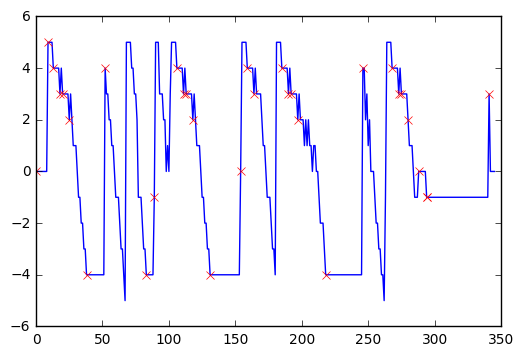

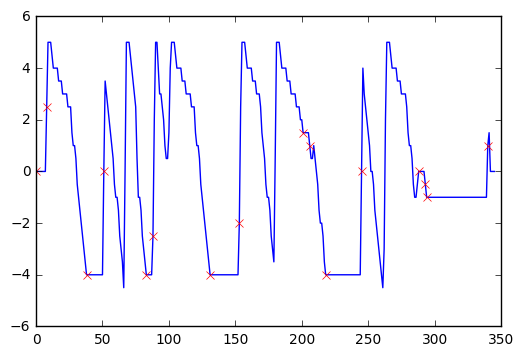

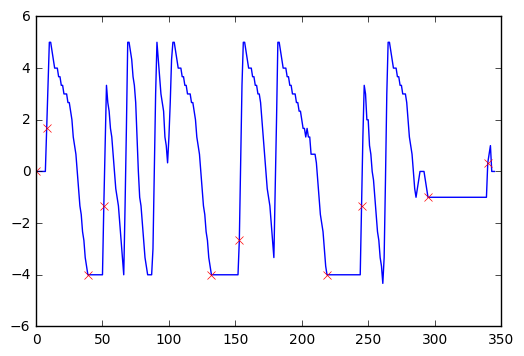

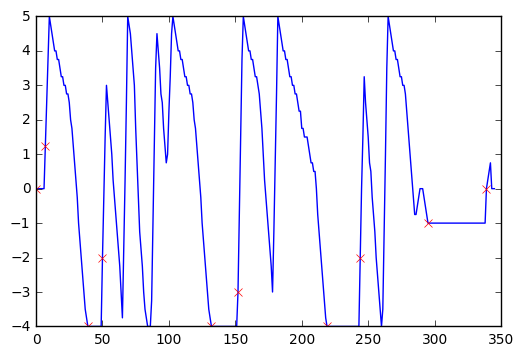

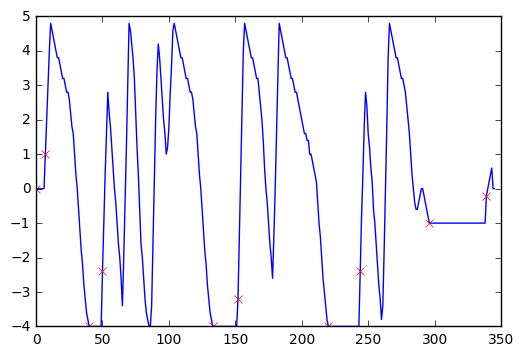

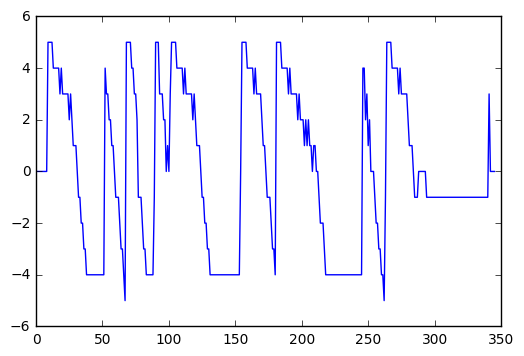

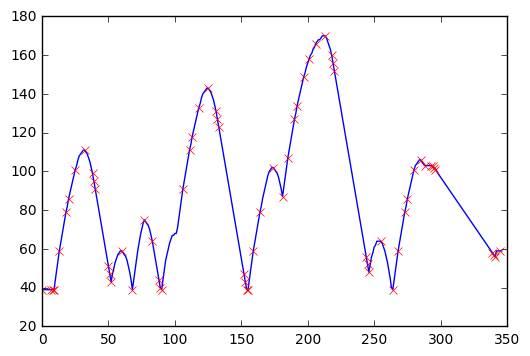

In [13]:
axis = 2

velocities = track[1:,axis]-track[:-1,axis] 

same_window = 5

switch_points = set([])
switch_points |= set(zero_crossings(velocities))
for w in range(1,6):
    smoothed = scipy.ndimage.filters.convolve1d(velocities, np.ones(w)/w)
    #print smoothed
    plt.plot(smoothed)
    
    points = samey_intervals(smoothed,t_window=same_window)
    plt.plot(np.array(points),smoothed[np.array(points,dtype='int')],'rx')
    plt.show()
    switch_points |= set(points)


velocity_times = sorted(switch_points)

plt.plot(velocities)
plt.show()

plt.plot(track[:,2])
plt.plot(np.array(velocity_times),track[np.array(velocity_times,dtype='int'),2],'rx')
plt.show()


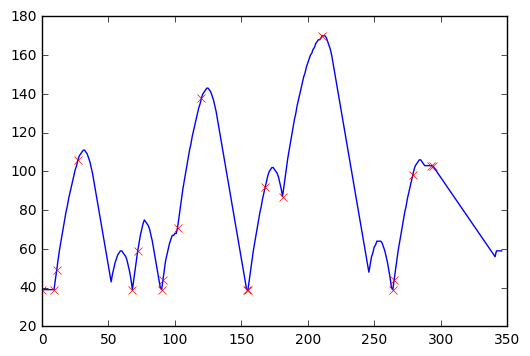

In [14]:
def button_change_times(button_masks):
    last_mask = 0
    mask_times = []
    for t, b in enumerate(button_masks):
        if b != last_mask:
            mask_times.append(t)
            last_mask = b
    return mask_times

button_times = button_change_times(track[:,3])

plt.plot(track[:,2])
plt.plot(np.array(button_times),track[np.array(button_times,dtype='int'),2],'rx')
plt.show()

In [34]:
# Templates is an array of model-generating functions of increasing complexity.
templates = [
    # Constant 0 velocity
    ("c0",lambda n,axis,vs,pv: pm.Normal(
        n, 
        mu=0,
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Constant velocity from old value
    ("cP",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pv,
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Fixed constant velocity
    ("cN",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pm.Normal(n+"_N",mu=0,sd=20),
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Constant acceleration from 0
    ("acc0",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pm.Normal(n+"_acc",mu=0,sd=20)*vs[:,0],
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Constant acceleration from old velocity value
    ("accP",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pv+pm.Normal(n+"_acc",mu=0,sd=20)*vs[:,0],
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Constant acceleration from fixed constant velocity
    ("accN",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pm.Normal(n+"_N",mu=0,sd=20)+pm.Normal(n+"_acc",mu=0,sd=20)*vs[:,0],
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
]
templates = templates

In [16]:
def model_template_generate(template_i, axis, segment, prev_val):
    axisNames = [None,"x","y"]
    template = templates[template_i]
    (tn, t) = template
    with pm.Model() as model:
        lik = t(axisNames[axis],axis,segment,prev_val)
        step = pm.Metropolis()
        trace = pm.sample(10000, step, progressbar=False)
    return (tn,model,trace,lik)

In [17]:
def model_set_generate(data):
    track,all_times,axis,i,j = data
    t0 = all_times[i]
    t1 = all_times[j]
    print "go",i,j,t0,t1
    segment = track[t0:t1]
    result = map(
        lambda ti: model_template_generate(ti, 
                                           axis,
                                           segment,
                                           track[t0-1][axis] if t0 > 0 else track[0][axis]),
        range(0,len(templates)))
    return (i,j,t0,t1,result)

In [ ]:
%%timeit

all_times = sorted(set(velocity_times + button_times))
all_times = all_times[:len(all_times)/4]

likes = [None]*len(all_times)
for i in range(0,len(all_times)):
    likes[i] = [None]*len(all_times)
    t0 = all_times[i]
    js = map(model_set_generate,
             map(lambda j:(track,all_times,axis,i,j),range(i+1, len(all_times))))
    likes[i][i+1:len(all_times)] = js

print "Done!"

Applied log-transform to y_err and added transformed y_err_log_ to model.


go 0 1 0 7


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


In [33]:
for li in likes[1:2]:
    for lij in li[3:10]:
        if lij is None or lij == []: continue
        (i,j,t0,t1,models) = lij
        print i,j,t0,t1
        for (tn,_,trace,_) in models:
            print tn,pm.summary(trace,varnames=["y_err"])

1 3 7 9
accP
y_err:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.132            1.115            0.102            [0.000, 0.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          0.000          0.000          0.128

 None
accN
y_err:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  3.476            7.743            0.679            [0.024, 14.585]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.064          0.202          0.634          3.147          25.801

 None
1 4 7 11
accP
y_err:

  Mean             SD               MC Error         9